In [23]:
# importações das bibliotecas

# importação dos modulos com os algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier                             # importação do algoritmo de árvore de decisão
from sklearn.ensemble import RandomForestClassifier                         # importação do algoritmo de floresta aleatória
from sklearn.neighbors import KNeighborsClassifier                          # importação do algoritmo de vizinhos
from sklearn.svm import SVC                                                 # importação do algoritmo de SVM
from sklearn.linear_model import LogisticRegression                         # importação do algoritmo de regressão logística
from sklearn.neural_network import MLPClassifier                            # importação do algoritmo de rede neural


# importação dos modulos para avaliação de modelos
from sklearn.model_selection import GridSearchCV                            # importação do GridSearchCV ( otimização em grid )
from sklearn.model_selection import cross_val_score, KFold                  # importação do cross_val_score ( avaliação cruzada )
from sklearn.metrics import accuracy_score                                  # importação do accuracy_score ( avaliação de precisão )
from sklearn.metrics import confusion_matrix                                # importação do confusion_matrix ( matriz de confusão )
from sklearn.metrics import classification_report                           # importação do classification_report ( relatório de classificação )


# importação de modulos para manipulação de dados
import pandas as pd                                                        # importação do pandas para manipulação de dados
import pickle as pkl                                                       # importação do pickle para salvar o modelo
import numpy as np                                                         # importação do numpy para manipulação de dados numericos
import warnings                                                            # importação do warnings para não mostrar mensagens de aviso

# não mostrar mensagens de aviso
warnings.filterwarnings("ignore")

In [4]:
# baixando os dados ja tratandos e salvos em um arquivo pickle

with open('./data/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pkl.load(f)

In [5]:
# tamanho dos dados

X_credit_treinamento.shape, y_credit_treinamento.shape, X_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [6]:
# concatenando as bases de treinamento para uso de GridSearchCV

X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
X_credit.shape

(2000, 3)

In [7]:
# dados completos para treinamento

X_credit

array([[-1.3754462 ,  0.50630999,  0.10980934],
       [ 1.45826409, -1.64894017, -1.21501497],
       [-0.79356829,  0.22531104, -0.43370226],
       ...,
       [ 1.37445674, -1.05746369, -1.12564819],
       [-1.57087737, -0.6348826 , -0.36981671],
       [-1.03572293, -0.93978209,  0.04244312]])

In [8]:
# concatenando as bases de treinamento para uso de GridSearchCV

y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [9]:
# dados completos classes

y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [10]:
# parametros para o modelo de arvores de decisão para o GridSearchCV

parametros_ad = {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [11]:
# Decision Tree

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_ad)
grid_search.fit(X_credit, y_credit)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print('Melhores parametros: ', melhores_parametros, '\nMelhor resultado: ', melhor_resultado)

Melhores parametros:  {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'} 
Melhor resultado:  0.9840000000000002


In [12]:
# parametros para o modelo de Random Forest para o GridSearchCV

parametros_rf = {'criterion': ['gini', 'entropy'],
                 'n_estimators': [10, 20],
                 'min_samples_split': [2, 5, 6, 10],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 10]}

In [13]:
# Random Forest

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_rf)
grid_search.fit(X_credit, y_credit)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print('Melhores parametros: ', melhores_parametros, '\nMelhor resultado: ', melhor_resultado)

Melhores parametros:  {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20} 
Melhor resultado:  0.9870000000000001


In [14]:
# parametros para o modelo de K-Neigbors para o GridSearchCV

parametros_knn = {'n_neighbors': [3, 4, 5, 6, 8, 9, 10, 15, 20],
                  'p': [1, 2]}


In [15]:
# K-Nearest Neighbors

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)
grid_search.fit(X_credit, y_credit)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print('Melhores parametros: ', melhores_parametros, '\nMelhor resultado: ', melhor_resultado)

Melhores parametros:  {'n_neighbors': 15, 'p': 1} 
Melhor resultado:  0.984


In [16]:
# parametros para o modelo de Logistic Regression para o GridSearchCV

parametros_lr ={'tol': [0.001, 0.00001, 0.000001],
                'C': [1.0, 1.5, 2.0],
                'solver': ['lbfgs', 'sag', 'saga']}

In [17]:
# Logistic Regression

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros_lr)
grid_search.fit(X_credit, y_credit)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print('Melhores parametros: ', melhores_parametros, '\nMelhor resultado: ', melhor_resultado)

Melhores parametros:  {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.001} 
Melhor resultado:  0.9484999999999999


In [18]:
# parametros para o modelo de SVM para o GridSearchCV

parametros_svm = {'tol': [0.001, 0.0001, 0.00001],
                  'C': [1.0, 1.5, 2.0],
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                   }

In [19]:
# SVM Suport Vector Machine

grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros_svm)
grid_search.fit(X_credit, y_credit)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print('Melhores parametros: ', melhores_parametros, '\nMelhor resultado: ', melhor_resultado)

Melhores parametros:  {'C': 1.5, 'kernel': 'rbf', 'tol': 0.001} 
Melhor resultado:  0.9829999999999999


In [20]:
# parametros para o modelo de Neural Network para o GridSearchCV

parametros_nn = {'activation': ['logistic', 'tanh', 'relu'],
                 'batch_size': [56],
                 'solver': ['sgd', 'adam']}                   

In [21]:
# MultiLayer Perceptron Neural Network

grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros_nn)
grid_search.fit(X_credit, y_credit)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print('Melhores parametros: ', melhores_parametros, '\nMelhor resultado: ', melhor_resultado)

Melhores parametros:  {'activation': 'relu', 'batch_size': 56, 'solver': 'adam'} 
Melhor resultado:  0.9964999999999999


In [22]:
# avaliando os modelos com cross validation

resultados_arvore= []
resultados_random_forest = []
resultados_knn = []
resultados_logistic_regression = []
resultados_svm = []
resultados_nn = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores_ad = cross_val_score(arvore, X_credit, y_credit, cv=kfold)
    resultados_arvore.append(scores_ad.mean())

    random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', min_samples_leaf=1, min_samples_split=5)
    scores_rf = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores_rf.mean())

    knn = KNeighborsClassifier()
    scores_knn = cross_val_score(knn, X_credit, y_credit, cv=kfold)
    resultados_knn.append(scores_knn.mean())

    logistic_regression = LogisticRegression(tol=0.0001, C=1.0, solver='lbfgs')
    scores_lr = cross_val_score(logistic_regression, X_credit, y_credit, cv=kfold)
    resultados_logistic_regression.append(scores_lr.mean())

    svm = SVC(C=2.0, kernel='rbf')
    scores_svm = cross_val_score(svm, X_credit, y_credit, cv=kfold)
    resultados_svm.append(scores_svm.mean())

    nn = MLPClassifier(activation='relu', batch_size=10, solver='adam')
    scores_nn = cross_val_score(nn, X_credit, y_credit, cv=kfold)
    resultados_nn.append(scores_nn.mean())

In [24]:
# Dataframe com os resultados

resultados_algo = pd.DataFrame({'Decision Tree': resultados_arvore,
                   'Random Forest': resultados_random_forest,
                   'K-Nearest Neighbors': resultados_knn,
                   'Logistic Regression': resultados_logistic_regression,
                   'SVM': resultados_svm,
                   'Neural Network': resultados_nn})


In [31]:
# visualizando os resultados

resultados_algo.head()

,Decision Tree,Random Forest,K-Nearest Neighbors,Logistic Regression,SVM,Neural Network
0,0.9865,0.9860,0.9815,0.9475,0.9845,0.9965
1,0.9855,0.9810,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9860,0.9795,0.9470,0.9865,0.9955
3,0.9875,0.9815,0.9780,0.9460,0.9850,0.9955
4,0.9885,0.9835,0.9820,0.9465,0.9850,0.9960


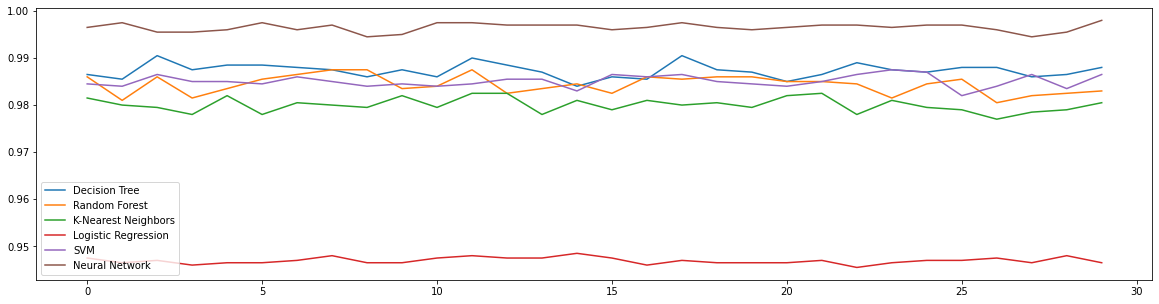

In [29]:
# visualizando os resultados como um gráfico

resultados_algo.plot(kind='line', figsize=(20, 5));

In [25]:
# variancia dos resultados

resultados_algo.var()

Decision Tree          2.370402e-06
Random Forest          3.968103e-06
K-Nearest Neighbors    2.350862e-06
Logistic Regression    4.715517e-07
SVM                    1.639368e-06
Neural Network         8.186782e-07
dtype: float64

In [26]:
# coeficiente de variação em %

(resultados_algo.std() / resultados_algo.mean()).sort_values(ascending=False)

Random Forest          0.002024
K-Nearest Neighbors    0.001564
Decision Tree          0.001559
SVM                    0.001300
Neural Network         0.000908
Logistic Regression    0.000725
dtype: float64

In [33]:
# salvando os dados em um csv

resultados_algo.to_csv('cls01-resultados_algo.csv')